In [1]:
# Dylan Kearney - 18227023, Cyiaph McCann - 17233453
# The code executes to the end without an error.

Unzip the folders

In [2]:
!unzip flowers.zip

#Note: the folders are layed out as so
# flowers.zip
# -- daisy
# -- dandelion
# -- etc...

# so that, when you unzip the flowers.zip, the flower folders are ready to use

Archive:  flowers.zip
   creating: daisy/
  inflating: daisy/100080576_f52e8ee070_n.jpg  
  inflating: daisy/10140303196_b88d3d6cec.jpg  
  inflating: daisy/10172379554_b296050f82_n.jpg  
  inflating: daisy/10172567486_2748826a8b.jpg  
  inflating: daisy/10172636503_21bededa75_n.jpg  
  inflating: daisy/102841525_bd6628ae3c.jpg  
  inflating: daisy/10300722094_28fa978807_n.jpg  
  inflating: daisy/1031799732_e7f4008c03.jpg  
  inflating: daisy/10391248763_1d16681106_n.jpg  
  inflating: daisy/10437754174_22ec990b77_m.jpg  
  inflating: daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: daisy/10437929963_bc13eebe0c.jpg  
  inflating: daisy/10466290366_cc72e33532.jpg  
  inflating: daisy/10466558316_a7198b87e2.jpg  
  inflating: daisy/10555749515_13a12a026e.jpg  
  inflating: daisy/10555815624_dc211569b0.jpg  
  inflating: daisy/10555826524_423eb8bf71_n.jpg  
  inflating: daisy/10559679065_50d2b16f6d.jpg  
  inflating: daisy/105806915_a9c13e2106_n.jpg  
  inflating: daisy/10712722853_5632

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

# Dataset



In [4]:
# here we list the types of flowers we will attempt to classify

CLASSES = ['daisy','dandelion','rose','sunflower','tulip'] 
print("Number of flower classes: ", len(CLASSES))

Number of flower classes:  5


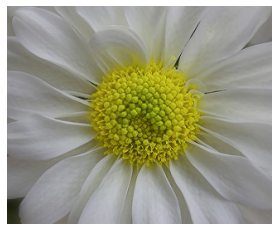

In [5]:
# here we load a single image from the unzipped folder daisy 

dir = './'
img = load_img(dir + CLASSES[0] + "/100080576_f52e8ee070_n.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
x = img_to_array(img)
print(x.shape)

(263, 320, 3)


### Data-preprocessing

 - Read in the images from the different sub folders
 - CV2 reads in as BGR so we convert this to RGB
 - Normalize the image arrays for training

In [7]:
IMG_SIZE = 48
training_data = []
numsOfEachFlowerClass = []

def create_training_data():
  
  for c in CLASSES:
    #join the class name to the directory
    path = os.path.join(dir,c)
    count = 0
    class_num = CLASSES.index(c)
    for im in os.listdir(path):
      if im[-4:]=='.jpg':
        try:
          img_array = cv2.imread(os.path.join(path, im))
          image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
          resized_img_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
          count += 1

          #normalise the image pixel values
          image = resized_img_array/255.0
          
          training_data.append([image, class_num])
        except Exception as e:
          pass
    numsOfEachFlowerClass.append(count)

create_training_data()

Investigate the data.

It is a big dataset with over 4000 images. 
It has a mean of roughly 2 which means that the data is balanced as the class numbers go from 0 to 4

In [8]:
df = pd.DataFrame(training_data, columns=['Image Arrays', 'Flower Class'])
df.describe()

,Flower Class
count,4317.000000
mean,2.028029
std,1.425767
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [9]:
# Correlation
# Since we only have the Flower Class to correlate - we cannot perform correlation on the data

In [10]:
import random

# we must shuffle the data because at the moment, the data is in groups of classes
# i.e. the first 800 rows are Daisies and we dont want the model to be overfitted
# on Daisies and then switching to another class
random.shuffle(training_data)

In [11]:
#validate the data is shuffled by seeing if the class numbers vary
for im in training_data[:10]:
  print(im[1])

1
2
1
0
1
4
2
1
2
0


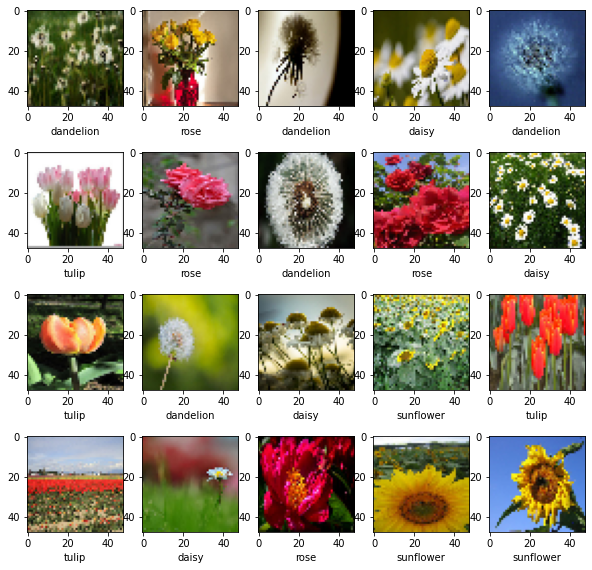

In [12]:
#sample the first 20 images in the training data
plt.figure(figsize=(10,10))
for i in range(20):
    
    plt.subplot(4,5,i+1)
    plt.grid(False)
    img = training_data[i][0]
    plt.imshow(img)
    plt.xlabel(CLASSES[training_data[i][1]])
plt.show()

We investigated the data types and if the columns have null values or not

### Visualisation
We wanted to visualise the correlation of the data; 
try see which variables might indicate a the likelyhood stroke

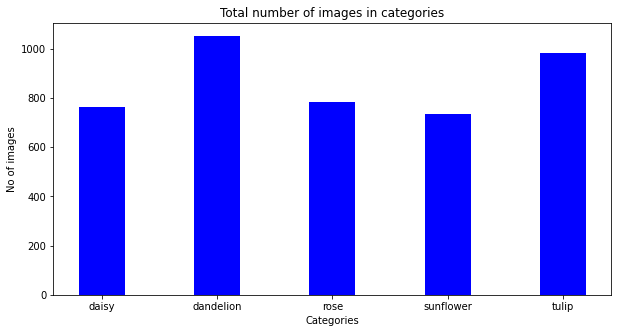

In [13]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(CLASSES, numsOfEachFlowerClass, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("No of images")
plt.title("Total number of images in categories")
plt.show()

# Preparing Test and Train sets


In [14]:
X = []
y = []

We separate the training data into features (image arrays) and labels (flower class)

In [15]:
for features, label in training_data[:-2]:
  X.append(features)
  y.append(label)

# reshape the image arrays to be 48 x 48 pixels and to be RGB hence the '3'
X = np.array(X).reshape((-1, IMG_SIZE, IMG_SIZE, 3))

# here we converts our label/class array of integers to binary class matrix.
y = tf.keras.utils.to_categorical(y)
y = np.array(y)

In [16]:
print(X.shape)
print(y.shape)

(4315, 48, 48, 3)
(4315, 5)


In [17]:
# we get train and test sets for each of the X and y
# the test size is 20% of the overall 
trainx, testx, trainy, testy = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=44)

In [18]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(3452, 48, 48, 3)
(3452, 5)
(863, 48, 48, 3)
(863, 5)


# Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [20]:
from tensorflow.keras.models import Model

In [21]:
# here we perform some image augmentation on the images
# flip the images horizontally and vertically, roatate them, zoom on them etc.

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                             rotation_range=20,zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.1,fill_mode="nearest")

In [22]:
# we initialise the dense net 201 with the correct input shape of the data
# we get the weights from imagenet
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(48,48,3),
                                                      include_top=False,
                                                      weights='imagenet',
                                                      pooling='avg')
pretrained_model.trainable = False

74850304/74836368 [==============================] - 2s 0us/step


In this block, we define the inputs and outputs for the pretrained model. 

**activation** 
We use 'relu' for the Dense model layers

We use 'softmax' for the output layer
The output layer has a size of the number of flower classes in the dataset.



In [23]:
inputs = pretrained_model.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(len(CLASSES), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

**Loss function** 

We first decided that **categorical_crossentropy** is the best choice as there are more than 2 flower classes. But we later found out that MSE gives us a significantly lower loss value.


We tried using sparse_categorical_crossentropy but this did not match the shape of the data.

**Optimizer**

optimizer is '**adam**' in order to attempt to minimize the loss function as fast as possible. This gave us the best accuracy and the least loss.

**Metrics**

We want to see the accuracy of the model as it runs.

In [24]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

We want to print out what the model looks like. We can see there are many layers including Batch Normalisation, Dense... etc.

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 54, 54, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']             
                                                                                              



**Fitting/Training the model**

Epochs sets the number of iterations of the model. We chose 10 epochs after some testing to try get the best result without overfitting. This was also partially due to constraints of the system we used to run the model.

Batch size splits the data into batches and processes them in parallel. We set this to 32 as we got the best results with this.

Verbose is boolean and logs the output so we set verbose to **true**.

We set the validation_data to the test sets. This is using an automatic validation dataset on our classification.


Now we save the models history so we can evaluate the accuracy and loss later

In [26]:
# here we fit the model. We apply the image data generator to perform data augmentation
# to prevent overfitting. 
# validation of the model is performed using the test sets 

hist = model.fit(datagen.flow(trainx,trainy,batch_size=32),
                 epochs=10, 
                 validation_data=(testx,testy)
)

Epoch 1/10
108/108 [==============================] - 59s 156ms/step - loss: 0.1098 - accuracy: 0.5773 - val_loss: 0.0922 - val_accuracy: 0.6686
Epoch 2/10
108/108 [==============================] - 11s 99ms/step - loss: 0.0926 - accuracy: 0.6596 - val_loss: 0.0846 - val_accuracy: 0.6999
Epoch 3/10
108/108 [==============================] - 10s 91ms/step - loss: 0.0862 - accuracy: 0.6929 - val_loss: 0.0868 - val_accuracy: 0.6802
Epoch 4/10
108/108 [==============================] - 11s 99ms/step - loss: 0.0829 - accuracy: 0.6947 - val_loss: 0.0862 - val_accuracy: 0.6952
Epoch 5/10
108/108 [==============================] - 10s 97ms/step - loss: 0.0823 - accuracy: 0.6947 - val_loss: 0.0837 - val_accuracy: 0.6790
Epoch 6/10
108/108 [==============================] - 10s 90ms/step - loss: 0.0790 - accuracy: 0.7118 - val_loss: 0.0769 - val_accuracy: 0.7173
Epoch 7/10
108/108 [==============================] - 10s 90ms/step - loss: 0.0774 - accuracy: 0.7167 - val_loss: 0.0773 - val_accuracy

# Results

Here we consider the results. 



'y_pred' is an array containing the predictions from the 
model based on the test set.

Here we calculate metrics precision, recall, F1 score and support.

In [27]:
y_pred = model.predict(testx)

# this array will contain the predicted class number of each image from 0 to 4
predicted_classes = np.argmax(y_pred, axis=1)

ground = np.argmax(testy, axis=1)
print(classification_report(ground,predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.51      0.64       160
           1       0.69      0.81      0.74       206
           2       0.70      0.63      0.66       152
           3       0.69      0.79      0.74       141
           4       0.66      0.74      0.69       204

    accuracy                           0.70       863
   macro avg       0.72      0.69      0.70       863
weighted avg       0.72      0.70      0.70       863



Here we plot the first 20 images of the dataset and their actual vs their predicted flower class

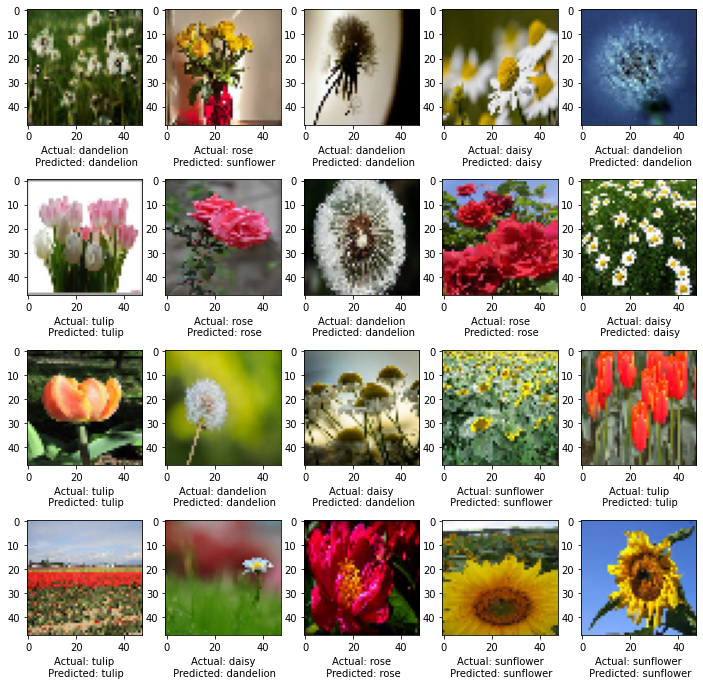

In [28]:
plt.figure(figsize=(12,12))

for i in range(20):
    
    plt.subplot(4,5,i+1)
    plt.grid(False)
    img = training_data[i][0]
    plt.imshow(img)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)
    value = np.argmax(prediction)
    plt.xlabel("Actual: "+ CLASSES[training_data[i][1]] 
               + "\n Predicted: " + CLASSES[value])
    
plt.show()

# you can see that it predicts a lot of the flower images well

# Evaluation

Evaluate the model on the test set

Tracking Results with different hyper params:

**Loss Function**
1. Categorical_crossentropy: ~70% loss
2. MSE: ~7% loss

We decided to chose MSE as to estimate the loss of the model so that the weights can be changed to reduce the loss.

**Optimizers**:

1. adam -> ~70.5% accuracy, 7% loss
2. SGD -> ~70% accuracy and 8% loss
3. RMSProp -> ~67% accuracy, 12% loss
4. adamax -> 65% accuracy, 9% loss


**Batch Size**

We increased the batch size and quickly noticed the accuracy reducing. Therefore we decided on a batch size of 32 in order to speed up computation while maintaining good accuracy.

In [29]:
score = model.evaluate(testx, testy, verbose=1)
print("loss = " + str(score[0]*100) + "% \naccuracy: "+ str(score[1]*100) + "%")

27/27 [==============================] - 2s 71ms/step - loss: 0.0783 - accuracy: 0.7010
loss = 7.834026962518692% 
accuracy: 70.1042890548706%


Here we count how many predictions the model got right.

We can see from this how much it got right and wrong.

In [30]:
# countWrong = 0

# for i in range(len(training_data)):
    
#     img = training_data[i][0]
#     img = np.array(img)
#     img = np.expand_dims(img, axis=0)
    
#     prediction = model.predict(img)
#     value = np.argmax(prediction)
    
#     if training_data[i][1] != value:
#       countWrong += 1
    

In [31]:
# print("Number of wrong predictions: " + str(countWrong) + " from " + str(len(training_data)) + " test cases")

**Check for overfitting and underfitting**

A model is thought to be overfitting if your validation loss has been increasing and underfit is the validation loss is still decreasing.



Next we plot how the accuracy changed over the Epochs on both the train and validation data.

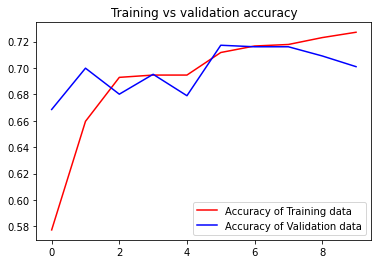

<Figure size 432x288 with 0 Axes>

In [32]:
get_acc = hist.history['accuracy']
value_acc = hist.history['val_accuracy']
get_loss = hist.history['loss']
validation_loss = hist.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

We can see above that the accuracy seems to level out between epochs 4 and 10.

Plot the validation set loss over the epochs

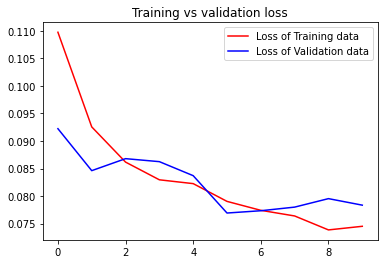

<Figure size 432x288 with 0 Axes>

In [33]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

We had a much higher loss with categorical_crossentropy than we now have with MSE

# Experimentations

### 1. We attempted to perform a simple 3 layer CNN to the data. This resulted in poor accuracy but it was a good starting point.

In [34]:
# model = Sequential()

# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation("sigmoid"))

In [35]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',  
#               metrics=['accuracy'])

In [36]:
# model.fit(X, y, batch_size=32, validation_split=0.1)